### Fundamental Theorem of Algebra
Consider a polynomial like $x^4 - 2x^2 + 1$. How many roots does it have? Try factoring it out, or just find the solutions using `numpy` or `sympy`. Plot them as dots (on the complex plain), or as their corresponding radius-vectors.

Now, try out the solutions to $x^3$, $x^4$, and $x^5$.

Try out different polynomials with real coefficients, or higher degrees (try out 5th, 6th, etc. - just to get a feel). What do you observe about their roots? What do you think about the _geometry_ of the visualization?

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import ScalarFormatter
from matplotlib.transforms import ScaledTranslation
from numpy.polynomial import Polynomial

In [20]:
# Hide one of the zeroes in the center.
class HideZeroFormatter(ScalarFormatter):
    """ Display an empty label if value == 0."""
    def __call__(self, value, pos=None):
        return '' if value == 0 else ScalarFormatter.__call__(self, value, pos)

def move_zero_tick_label(axis):
    labels = axis.get_majorticklabels()
    for label in labels:
        if label.get_text() == "0":
            label.set_transform(label.get_transform() + ScaledTranslation(-0.1, 0, axis.figure.dpi_scale_trans))

In [21]:
def plot_complex_numbers(numbers: list, colors: list, draw_circle: bool = False):
    """
    Plots the given complex numbers as radius vectors in the 2D space
    """
    # Move the axes to the origin.
    ax = plt.gca()
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Hide the zero for Y axis and move the zero for X axis.
    ax.yaxis.set_major_formatter(HideZeroFormatter())
    move_zero_tick_label(ax.xaxis) # Add transformation (move zero label)

    # Prepare the data points.
    zeros = [0 for _ in numbers]
    real_parts = [n.real for n in numbers]
    imag_parts = [n.imag for n in numbers]

    # Set the aspect ratio of the axes.
    max_range = abs(max(real_parts + imag_parts, key=abs)) + 1
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])

    # Draw circle line
    if draw_circle:
        max_radius = 0
        for n in numbers:
            x = abs(n.real)
            y = abs(n.imag)
            radius = np.sqrt(x**2 + y**2)
            max_radius = max(max_radius, radius)
        theta = np.linspace(0, 2*np.pi, 100)
        x = max_radius * np.cos(theta)
        y = max_radius * np.sin(theta)
        plt.plot(x, y, color="black", linestyle='dashed', linewidth=1)
        plt.axis('equal')

    # Plot the data points.
    plt.scatter(real_parts, imag_parts)
    # Plot the vectors.
    plt.quiver(zeros, zeros, real_parts, imag_parts, angles = "xy", scale_units = "xy", scale = 1, width=0.004, color = colors)
    # Add legend for the vectors
    for i, n in enumerate(numbers):
        plt.scatter([], [], marker=r'$\longrightarrow$', c=colors[i], s=120, label=n)
    plt.legend(loc="upper right")

    plt.show()

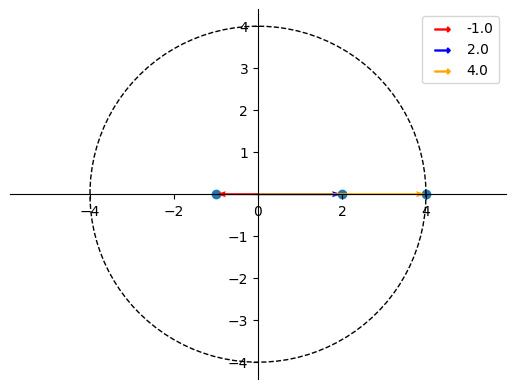

In [22]:
roots = Polynomial([8, 2, -5, 1]).roots()
roots = [np.round(r, 3) for r in roots]
plot_complex_numbers(roots, ["red", "blue", "orange"], True)

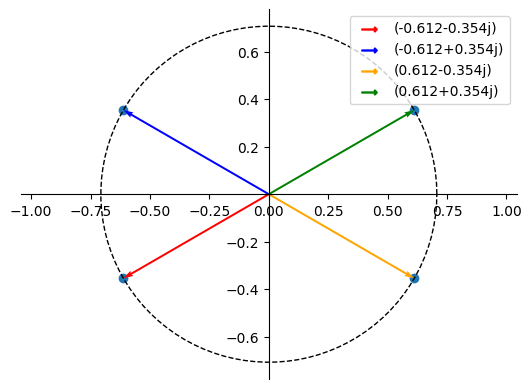

In [23]:
roots = Polynomial([1, 0, -2, 0, 4]).roots()
roots = [np.round(r, 3) for r in roots]
plot_complex_numbers(roots, ["red", "blue", "orange", "green"], True)

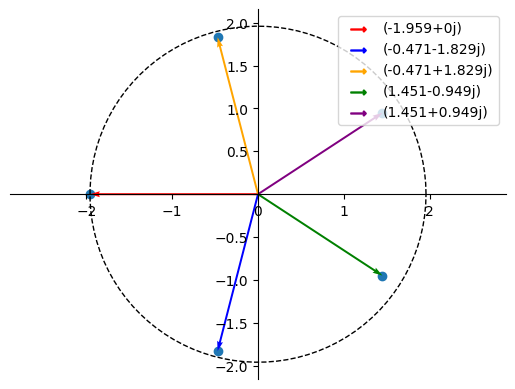

In [24]:
roots = Polynomial([21, -4, 0, 0, 0, 1]).roots()
roots = [np.round(r, 3) for r in roots]
plot_complex_numbers(roots, ["red", "blue", "orange", "green", "purple", "grey"], True)

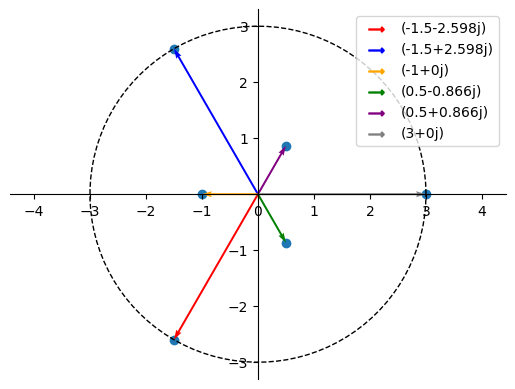

In [25]:
roots = Polynomial([-27, 0, 0, -26, 0, 0, 1]).roots()
roots = [np.round(r, 3) for r in roots]
plot_complex_numbers(roots, ["red", "blue", "orange", "green", "purple", "grey"], True)

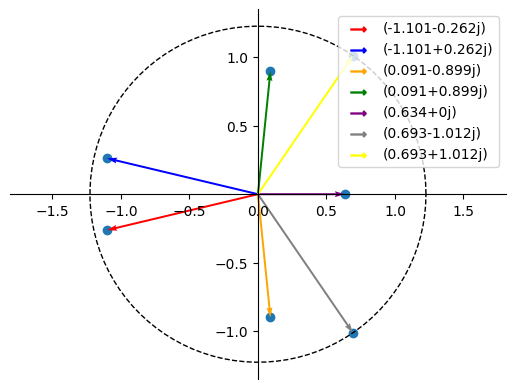

In [26]:
roots = Polynomial([-1, 1, 0, 0, 2, 0, 0, 1]).roots()
roots = [np.round(r, 3) for r in roots]
plot_complex_numbers(roots, ["red", "blue", "orange", "green", "purple", "grey", "yellow"], True)

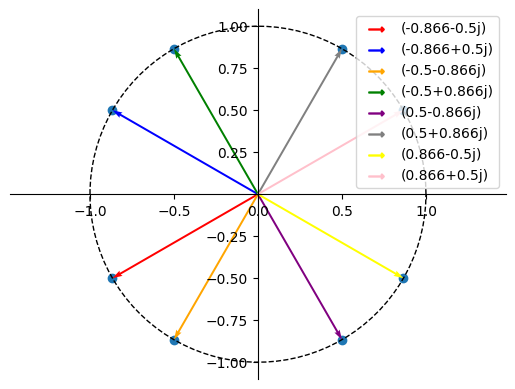

In [27]:
roots = Polynomial([1, 0, 0, 0, 1, 0, 0, 0, 1]).roots()
roots = [np.round(r, 3) for r in roots]
plot_complex_numbers(roots, ["red", "blue", "orange", "green", "purple", "grey", "yellow", "pink"], True)

#### Observations

* In all of the above examples the number of the roots is equal to the degree of the polynomial.
* If the polynomial coefficients are real numbers, then the roots are also real numbers or complex conjugates ($ [a + bi , a - bi] $)
* In some of the cases the angle between every two adjacent roots is always $2\pi/d$ , where $d$ is the degree of the polynomial.